# Forest Cover Type Prediction

## Traitement des données

### Télécharement des données

Les données https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data seront téléchargées à l'adresse *'./covtype/archives/'*

In [1]:
from urllib.request import urlopen
import os.path as osp
import os
import logging
import gzip
logging.getLogger().setLevel('INFO')

### Mémorisation des données

- *df_covtype* : DataFrame de toutes les données non traitées triées par attribut
- *labels* : array des étiquettes des types de forêts
- *dict_attributs* : dictionnaire qui associe les attributs aux bons index
- *qualitative* : attributs des données qualitatives
- *wilderness* et *soil* : garde en mémoire les vecteurs binaires pour les remplacer par des entiers

    - **Wilderness Areas** 	
        - 1 : Rawah Wilderness Area
        - 2 : Neota Wilderness Area
        - 3 : Comanche Peak Wilderness Area
        - 4 : Cache la Poudre Wilderness Area
       
    - **Soil Types**
        - 1 to 40 : based on the USFS Ecological Landtype Units for this study area.

    - **Forest Cover Types**
        - 1 Spruce/Fir
        - 2 Lodgepole Pine
        - 3 Ponderosa Pine
        - 4 Cottonwood/Willow
        - 5 Aspen
        - 6 Douglas-fir
        - 7 Krummholz

In [2]:
import pandas as pd
import numpy as np

In [3]:
dict_attributs = {'Elevation':[0],'Aspect':[1],'Slope':[2],
                  'Horizontal_Distance_To_Hydrology':[3],
                  'Vertical_Distance_To_Hydrology':[4],
                  'Horizontal_Distance_To_Roadways':[5],
                  'Hillshade_9am':[6],'Hillshade_Noon':[7],
                  'Hillshade_3pm':[8],
                  'Horiontal_Distance_To_Fire_Points':[9],
                  'Wilderness_Area':[10,11,12,13],
                  'Soil_Type':list(range(14,54)),
                  'Cover_Type':[54]}

qualitative = ['Cover_Type','Wilderness_Area','Soil_Type']

def convert_to_listofbool(df_attribut):
    return [[int(x) for x in X.split()] for X in df_attribut]

def convert_to_int(df_attribut):
    return [int(x) for x in df_attribut]

def convert_to_float(df_attribut):
    return [float(x) for x in df_attribut]

In [4]:
df_covtype = pd.read_csv('covtype/archives/covtype.data.gz',
                         header=None,
                         parse_dates=dict_attributs,
                         compression='gzip')

labels = np.unique(df_covtype.Cover_Type.values)

for attribut in dict_attributs:
    
    if attribut is 'Wilderness_Area':
        wilderness = convert_to_listofbool(df_covtype[attribut])
        df_covtype[attribut] = [x.index(1)+1 for x in wilderness]
    
    elif attribut is 'Soil_Type':
        soil = convert_to_listofbool(df_covtype[attribut])
        df_covtype[attribut] = [x.index(1)+1 for x in soil]
        
    elif attribut in ['Cover_Type','Hillshade_9am','Hillshade_Noon','Hillshade_3pm']:
        df_covtype[attribut] = convert_to_int(df_covtype[attribut])
        
    else:
        df_covtype[attribut] = convert_to_float(df_covtype[attribut])

In [5]:
df_covtype.head(10)

,Wilderness_Area,Cover_Type,Horizontal_Distance_To_Hydrology,Elevation,Soil_Type,Horizontal_Distance_To_Roadways,Horiontal_Distance_To_Fire_Points,Slope,Vertical_Distance_To_Hydrology,Hillshade_Noon,Hillshade_9am,Hillshade_3pm,Aspect
0,1,5,258.0,2596.0,29,510.0,6279.0,3.0,0.0,232,221,148,51.0
1,1,5,212.0,2590.0,29,390.0,6225.0,2.0,-6.0,235,220,151,56.0
2,1,2,268.0,2804.0,12,3180.0,6121.0,9.0,65.0,238,234,135,139.0
3,1,2,242.0,2785.0,30,3090.0,6211.0,18.0,118.0,238,238,122,155.0
4,1,5,153.0,2595.0,29,391.0,6172.0,2.0,-1.0,234,220,150,45.0
5,1,2,300.0,2579.0,29,67.0,6031.0,6.0,-15.0,237,230,140,132.0
6,1,5,270.0,2606.0,29,633.0,6256.0,7.0,5.0,225,222,138,45.0
7,1,5,234.0,2605.0,29,573.0,6228.0,4.0,7.0,230,222,144,49.0
8,1,5,240.0,2617.0,29,666.0,6244.0,9.0,56.0,221,223,133,45.0
9,1,5,247.0,2612.0,29,636.0,6230.0,10.0,11.0,219,228,124,59.0


## Analyse préliminaire et pré-traitement des données 

In [6]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

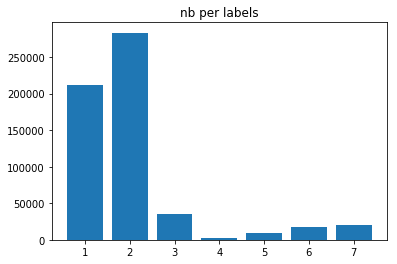

In [7]:
df_bycovtype = df_covtype.groupby('Cover_Type')

nb_per_labels=df_bycovtype.size()
plt.bar(labels,nb_per_labels.values)
plt.title('nb per labels')
plt.show()

In [8]:
df_bycovtype.mean()

,Wilderness_Area,Horizontal_Distance_To_Hydrology,Elevation,Soil_Type,Horizontal_Distance_To_Roadways,Horiontal_Distance_To_Fire_Points,Slope,Vertical_Distance_To_Hydrology,Hillshade_Noon,Hillshade_9am,Hillshade_3pm,Aspect
Cover_Type,,,,,,,,,,,,
1,1.914138,270.555245,3128.644888,27.749514,2614.834517,2009.253517,13.127110,42.156939,223.430211,211.998782,143.875038,156.138227
2,1.946869,279.916442,2920.936061,24.351732,2429.530799,2168.154849,13.550499,45.884219,225.326596,213.844423,142.983466,152.060515
3,3.600045,210.276473,2394.509845,6.285618,943.940734,910.955949,20.770208,62.446915,215.826537,201.918415,140.367176,176.372490
4,4.000000,106.934838,2223.939934,7.028031,914.199490,859.124135,18.528941,41.186749,216.997088,228.345832,111.392792,137.139425
5,2.203413,212.354893,2787.417571,21.696303,1349.765722,1577.719794,16.641315,50.610344,219.035816,223.474876,121.920889,139.283051
6,3.560891,159.853458,2419.181897,10.174814,1037.169805,1055.351471,19.048886,45.437439,209.827662,192.844302,148.284044,180.539068
7,2.390249,356.994686,3361.928669,36.608191,2738.250463,2070.031594,14.255924,69.474305,221.746026,216.967723,134.932033,153.236226


On regarde d'abord les valeurs moyennes de chaque attribut, par classe, pour observer une première fois les attributs les plus importants.

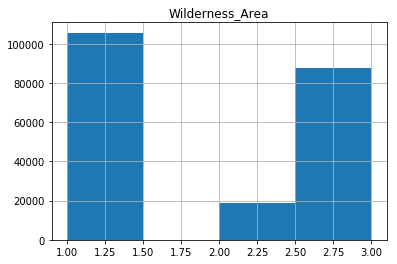

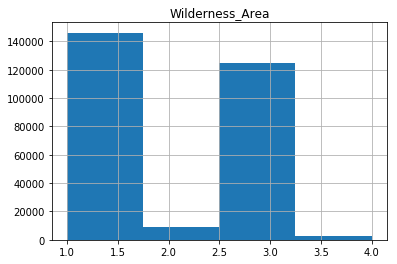

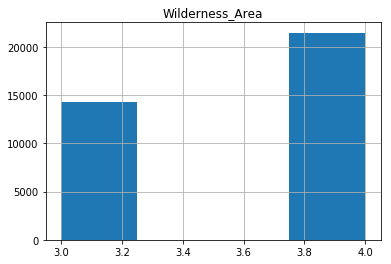

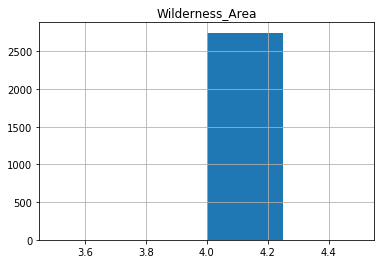

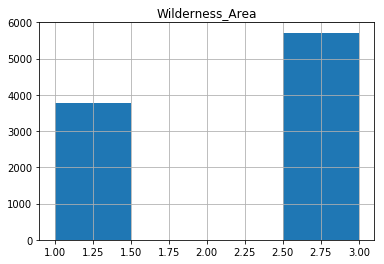

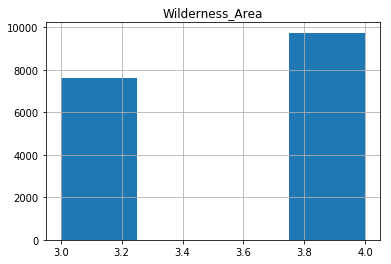

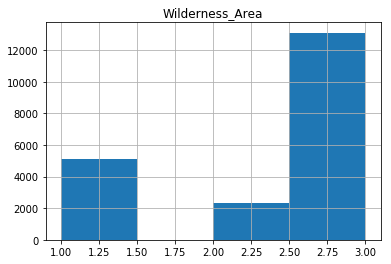

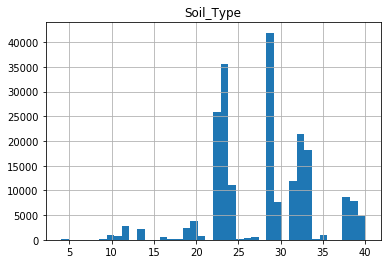

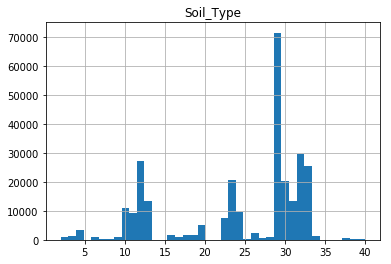

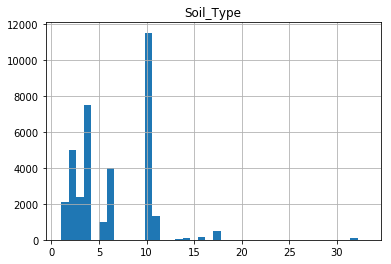

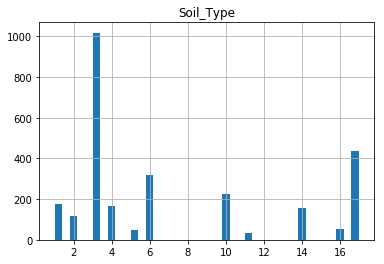

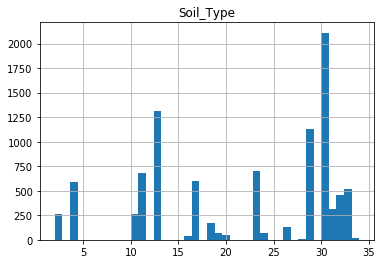

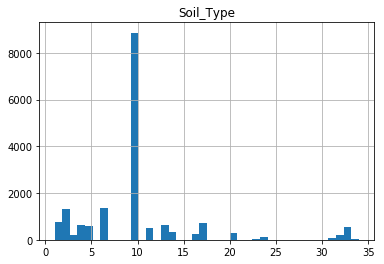

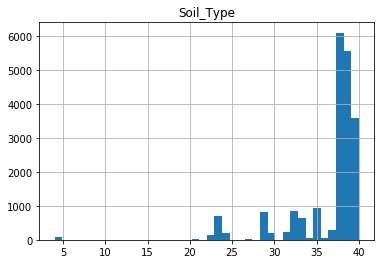

In [9]:
for attribut in ['Wilderness_Area','Soil_Type']:
    attribut_labels = np.unique(df_covtype[attribut].values)
    df_bycovtype.hist(column=attribut,bins=max(attribut_labels),sharex=True)
    plt.show()

On voit que les distributions des deux données qualitatives sont importantes, nous allons donc les garder, malgré le fait que nous ayons 54 paramètres au lieu de 10.

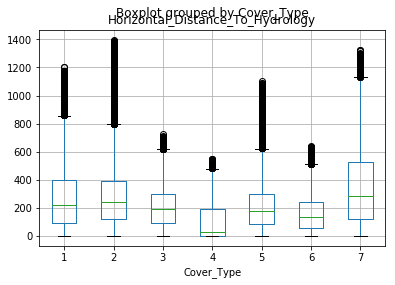

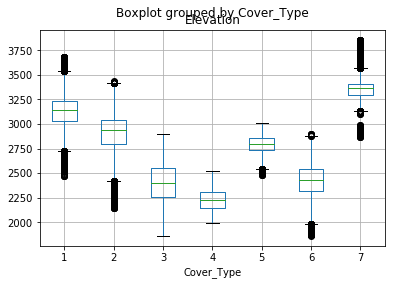

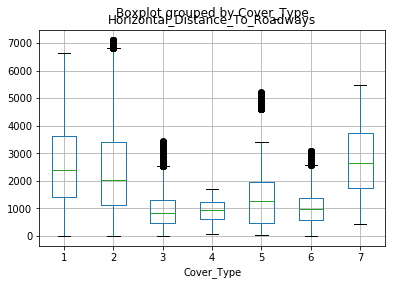

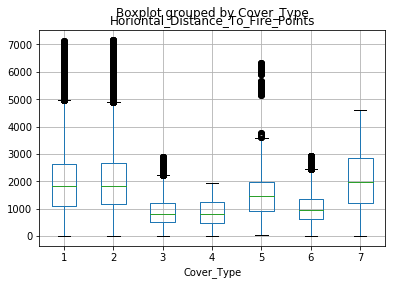

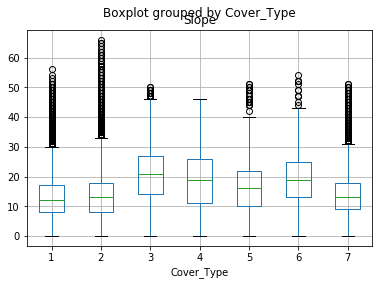

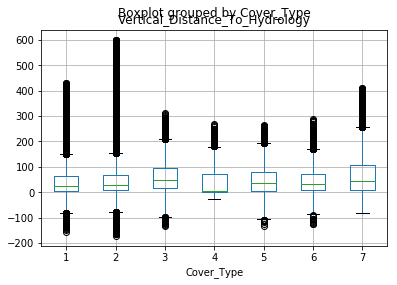

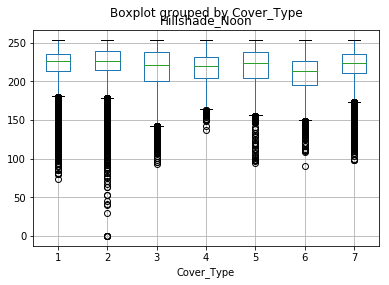

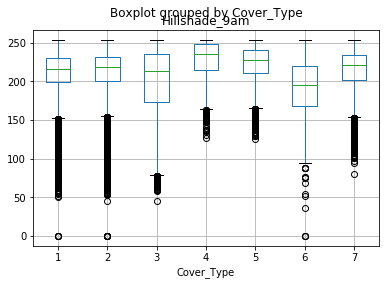

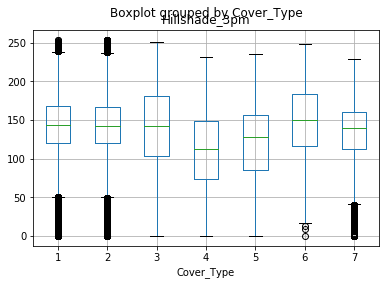

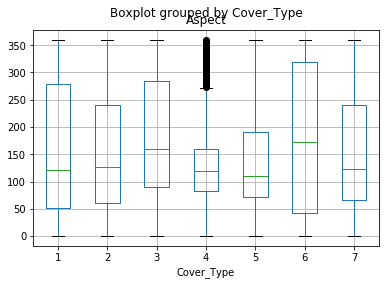

In [10]:
for attribut in dict_attributs:
    if not(attribut in qualitative):
        df_covtype.boxplot(column=attribut,by='Cover_Type')
        plt.show()

Ici on voit que les données sur l'ombre au solstice ne varient pas beaucoup selon les types de forêts. Nous chercherons

In [11]:
def scatter(keys):
    sm = scatter_matrix(df_covtype[keys][:500],c=df_covtype.Cover_Type.values[:500])

    #Change label rotation
    [s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
    [s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]

    #May need to offset label when rotating to prevent overlap of figure
    [s.get_yaxis().set_label_coords(-0.5,0.5) for s in sm.reshape(-1)]

    #Hide all ticks
    [s.set_xticks(()) for s in sm.reshape(-1)]
    [s.set_yticks(()) for s in sm.reshape(-1)]
    plt.show()

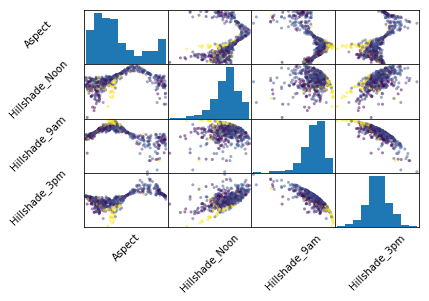

In [12]:
scatter(['Aspect','Hillshade_Noon','Hillshade_9am','Hillshade_3pm'])

On peut voir que les données sont corrélées. On peut potentiellement réduire le nombre d'attributs.

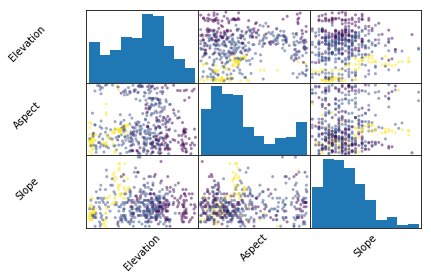

In [13]:
scatter(['Elevation','Aspect','Slope'])

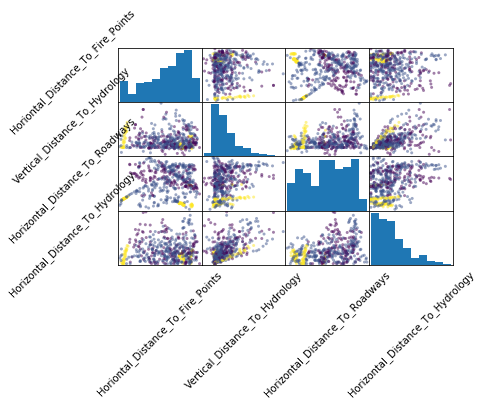

In [14]:
scatter(['Horiontal_Distance_To_Fire_Points',
        'Vertical_Distance_To_Hydrology',
        'Horizontal_Distance_To_Roadways',
        'Horizontal_Distance_To_Hydrology'])

### Normalisation et architecture des données

Quelques test en gardant les données Wilderness_Area et Soil_Type

In [15]:
# On sépare les labels et les données qualitatives des features
data0 = df_covtype.drop(qualitative,axis=1).values
target = df_covtype.Cover_Type.values

N,d = data0.shape
data = np.zeros((N,54))

# Normalisation
for i in range(d):
    data0[:,i] = data0[:,i]/sum(data0[:,i])
    
# On remet les données qualitative de sorte à pouvoir les exploiter
for n in range(N):
    deleted_data = np.concatenate([wilderness[n],soil[n]])
    data[n] = np.concatenate([data0[n],deleted_data])

### Données de train/validation/test

Pour l'instant on laisse les variables Wilderness_Area et Soil_Type de côté. On cherchera à savoir ensuite si les 54 attributs sont necessaires ou si les 10 premiers sont suffisants.

In [16]:
from sklearn.model_selection import train_test_split

In [27]:
# Ensemble de train et ensemble de test
(x_train,x_test,y_train,y_test) = train_test_split(data,target,
                                                   random_state=0,
                                                   test_size=.75)

# Ensemble de validation 
(x_train,x_valid,y_train,y_valid) = train_test_split(x_train,
                                                     y_train,
                                                     test_size=.11)

# Résumé
print("x_train shape:", x_train.shape, 
      "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (129275, 54) y_train shape: (129275,)
129275 train set
15978 validation set
435759 test set


## Test de différents modèles

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [20]:
for name, clf in zip(names, classifiers):
    clf.fit(x_train,y_train)
    predicted = clf.predict(x_valid)
    
    print('--------------------\n',name,'\n--------------------')
    print('Matrice de confusion :\n',confusion_matrix(y_valid,predicted),'\n')
    print(classification_report(y_valid,predicted))

    # Evaluate the model on test set
    score = clf.score(x_valid, y_valid)

    # Print test accuracy
    print('\n Test accuracy:', score)

--------------------
 Nearest Neighbors 
--------------------
Matrice de confusion :
 [[1924  354    3    0    7    3   31]
 [ 344 2666   30    0   26   17    5]
 [   1   26  333    4    4   33    0]
 [   0    0    9   26    0    1    0]
 [   8   29    0    0   70    4    0]
 [   0   23   37    1    2  123    0]
 [  26    8    0    0    0    0  214]] 

             precision    recall  f1-score   support

          1       0.84      0.83      0.83      2322
          2       0.86      0.86      0.86      3088
          3       0.81      0.83      0.82       401
          4       0.84      0.72      0.78        36
          5       0.64      0.63      0.64       111
          6       0.68      0.66      0.67       186
          7       0.86      0.86      0.86       248

avg / total       0.84      0.84      0.84      6392


 Test accuracy: 0.8379224030037546
--------------------
 Random Forest 
--------------------
Matrice de confusion :
 [[ 277 2045    0    0    0    0    0]
 [  89 29

/Users/kevinzagalo/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


--------------------
 Neural Net 
--------------------
Matrice de confusion :
 [[1164 1101    3    0    0    0   54]
 [ 609 2387   83    0    0    0    9]
 [   0   39  362    0    0    0    0]
 [   0    0   36    0    0    0    0]
 [  12   97    2    0    0    0    0]
 [   6   67  113    0    0    0    0]
 [  69   32    0    0    0    0  147]] 

             precision    recall  f1-score   support

          1       0.63      0.50      0.56      2322
          2       0.64      0.77      0.70      3088
          3       0.60      0.90      0.72       401
          4       0.00      0.00      0.00        36
          5       0.00      0.00      0.00       111
          6       0.00      0.00      0.00       186
          7       0.70      0.59      0.64       248

avg / total       0.60      0.64      0.61      6392


 Test accuracy: 0.6351689612015019


Au premier regard, on peut se dire que la methode des k-plus proches voisins est la plus adaptée. On teste donc plusieurs hyperparamètres.

In [21]:
for k in range(1,5):
    clf = KNeighborsClassifier(k)
    clf.fit(x_train,y_train)
    predicted = clf.predict(x_valid)
    
    print('\n-----------------------------\n' 
          + "Nearest Neighbors : "
          + "k = " + str(k)
          + '\n-----------------------------\n')
    print('Matrice de confusion :\n', confusion_matrix(y_valid,predicted),'\n')
    print('Rapport : \n', classification_report(y_valid,predicted))

    # Evaluate the model on test set
    score = clf.score(x_valid, y_valid)

    # Print test accuracy
    print('\n Test accuracy:', score)


-----------------------------
Nearest Neighbors : k = 1
-----------------------------

Matrice de confusion :
 [[1924  354    3    0    7    3   31]
 [ 344 2666   30    0   26   17    5]
 [   1   26  333    4    4   33    0]
 [   0    0    9   26    0    1    0]
 [   8   29    0    0   70    4    0]
 [   0   23   37    1    2  123    0]
 [  26    8    0    0    0    0  214]] 

Rapport : 
              precision    recall  f1-score   support

          1       0.84      0.83      0.83      2322
          2       0.86      0.86      0.86      3088
          3       0.81      0.83      0.82       401
          4       0.84      0.72      0.78        36
          5       0.64      0.63      0.64       111
          6       0.68      0.66      0.67       186
          7       0.86      0.86      0.86       248

avg / total       0.84      0.84      0.84      6392


 Test accuracy: 0.8379224030037546

-----------------------------
Nearest Neighbors : k = 2
-----------------------------

Mat

### Support Vector Machine

In [30]:
clf = SVC(gamma=.02,C=8500)

clf.fit(x_train,y_train)
predicted = clf.predict(x_valid)
    
print('----------------------\n SVM \n----------------------')
print('Matrice de confusion :\n',confusion_matrix(y_valid,predicted),'\n')
print(classification_report(y_valid,predicted))

# Evaluate the model on test set
score = clf.score(x_valid, y_valid)

# Print test accuracy
print('\n', 'Test accuracy:', score)

----------------------
 Neural Net 
----------------------
Matrice de confusion :
 [[2681 2932    5    0    0    1  132]
 [1100 6518  193    1    0    5   18]
 [   0  110  856   10    0    9    0]
 [   0    0   48   20    0    5    0]
 [  18  213    8    0    0    0    0]
 [  17  147  295    6    0   24    0]
 [ 166   95    1    0    0    0  344]] 

             precision    recall  f1-score   support

          1       0.67      0.47      0.55      5751
          2       0.65      0.83      0.73      7835
          3       0.61      0.87      0.72       985
          4       0.54      0.27      0.36        73
          5       0.00      0.00      0.00       239
          6       0.55      0.05      0.09       489
          7       0.70      0.57      0.63       606

avg / total       0.64      0.65      0.63     15978



/Users/kevinzagalo/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 Test accuracy: 0.6535861809988734
